In [2]:
import numpy as np
import pandas as pd
import skimage.io as sio

import diff_classifier.aws as aws
import diff_register.register as reg
import diff_register.im_process as imp

c:\users\enuser\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


One of the key features of diff_register is extracting cellular properties from input images. This demo notebook will show how to extract cellular properties without incorporating any accompanying multi-particle tracking datasets.

As an example dataset, I have included a large tif image of a DAPI stain in a brain slice from which we would like to extract cellular features. As DAPI stains cell nuclei, and cell nuclei are round, the resulting branch/process features won't be very informative, but users can see how they would be used

In [215]:
cprefix = '31.3_CA3'
cfile = '{}.tif'.format(cprefix)
cfile2 = '{}_s.tif'.format(cprefix)
cfolder = 'Microglia_TIFF_Regions'
bucket = 'dtoghani.data'

aws.download_s3('{}/{}'.format(cfolder, cfile), cfile, bucket_name=bucket)

cim = sio.imread(cfile)

pxrat_cells = 1.24
pxrat_traj = 0.16
dim_traj = 2048
dim_cells = int(np.round(dim_traj*pxrat_traj/pxrat_cells, decimals=0))

In [216]:
cim1 = np.swapaxes(cim, 0, 1)
cim1 = np.swapaxes(cim1, 1, 2)

In [217]:
sio.imsave('{}_s.tif'.format(cprefix), cim1)

c:\users\enuser\anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: 31.3_CA3_s.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [218]:
import seaborn as sns

Users can use the skimage.io toolbox to preview the image. This tilescan image is fairly large. If users want to view a subset of the image, they can use the indices of the image to zoom in.

c:\users\enuser\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
c:\users\enuser\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


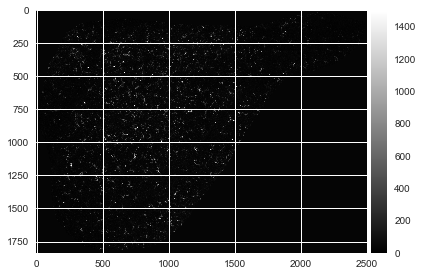

In [219]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sio.imshow(cim1[:, :, 1], cmap='gray', vmin=0, vmax=1500)

In [220]:
skel.shortim.shape

(630, 1311)

In [221]:
cim1.shape

(1836, 2502, 2)

diff_register can be run directly on large tilescans, but it is a good idea to optimize image processing parameters on a smaller image first. Try running skeleton_image on the small image from above.

c:\users\enuser\anaconda3\lib\site-packages\skimage\util\dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int32 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
c:\users\enuser\anaconda3\lib\site-packages\skimage\util\dtype.py:171: UserWarning: Downcasting int32 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


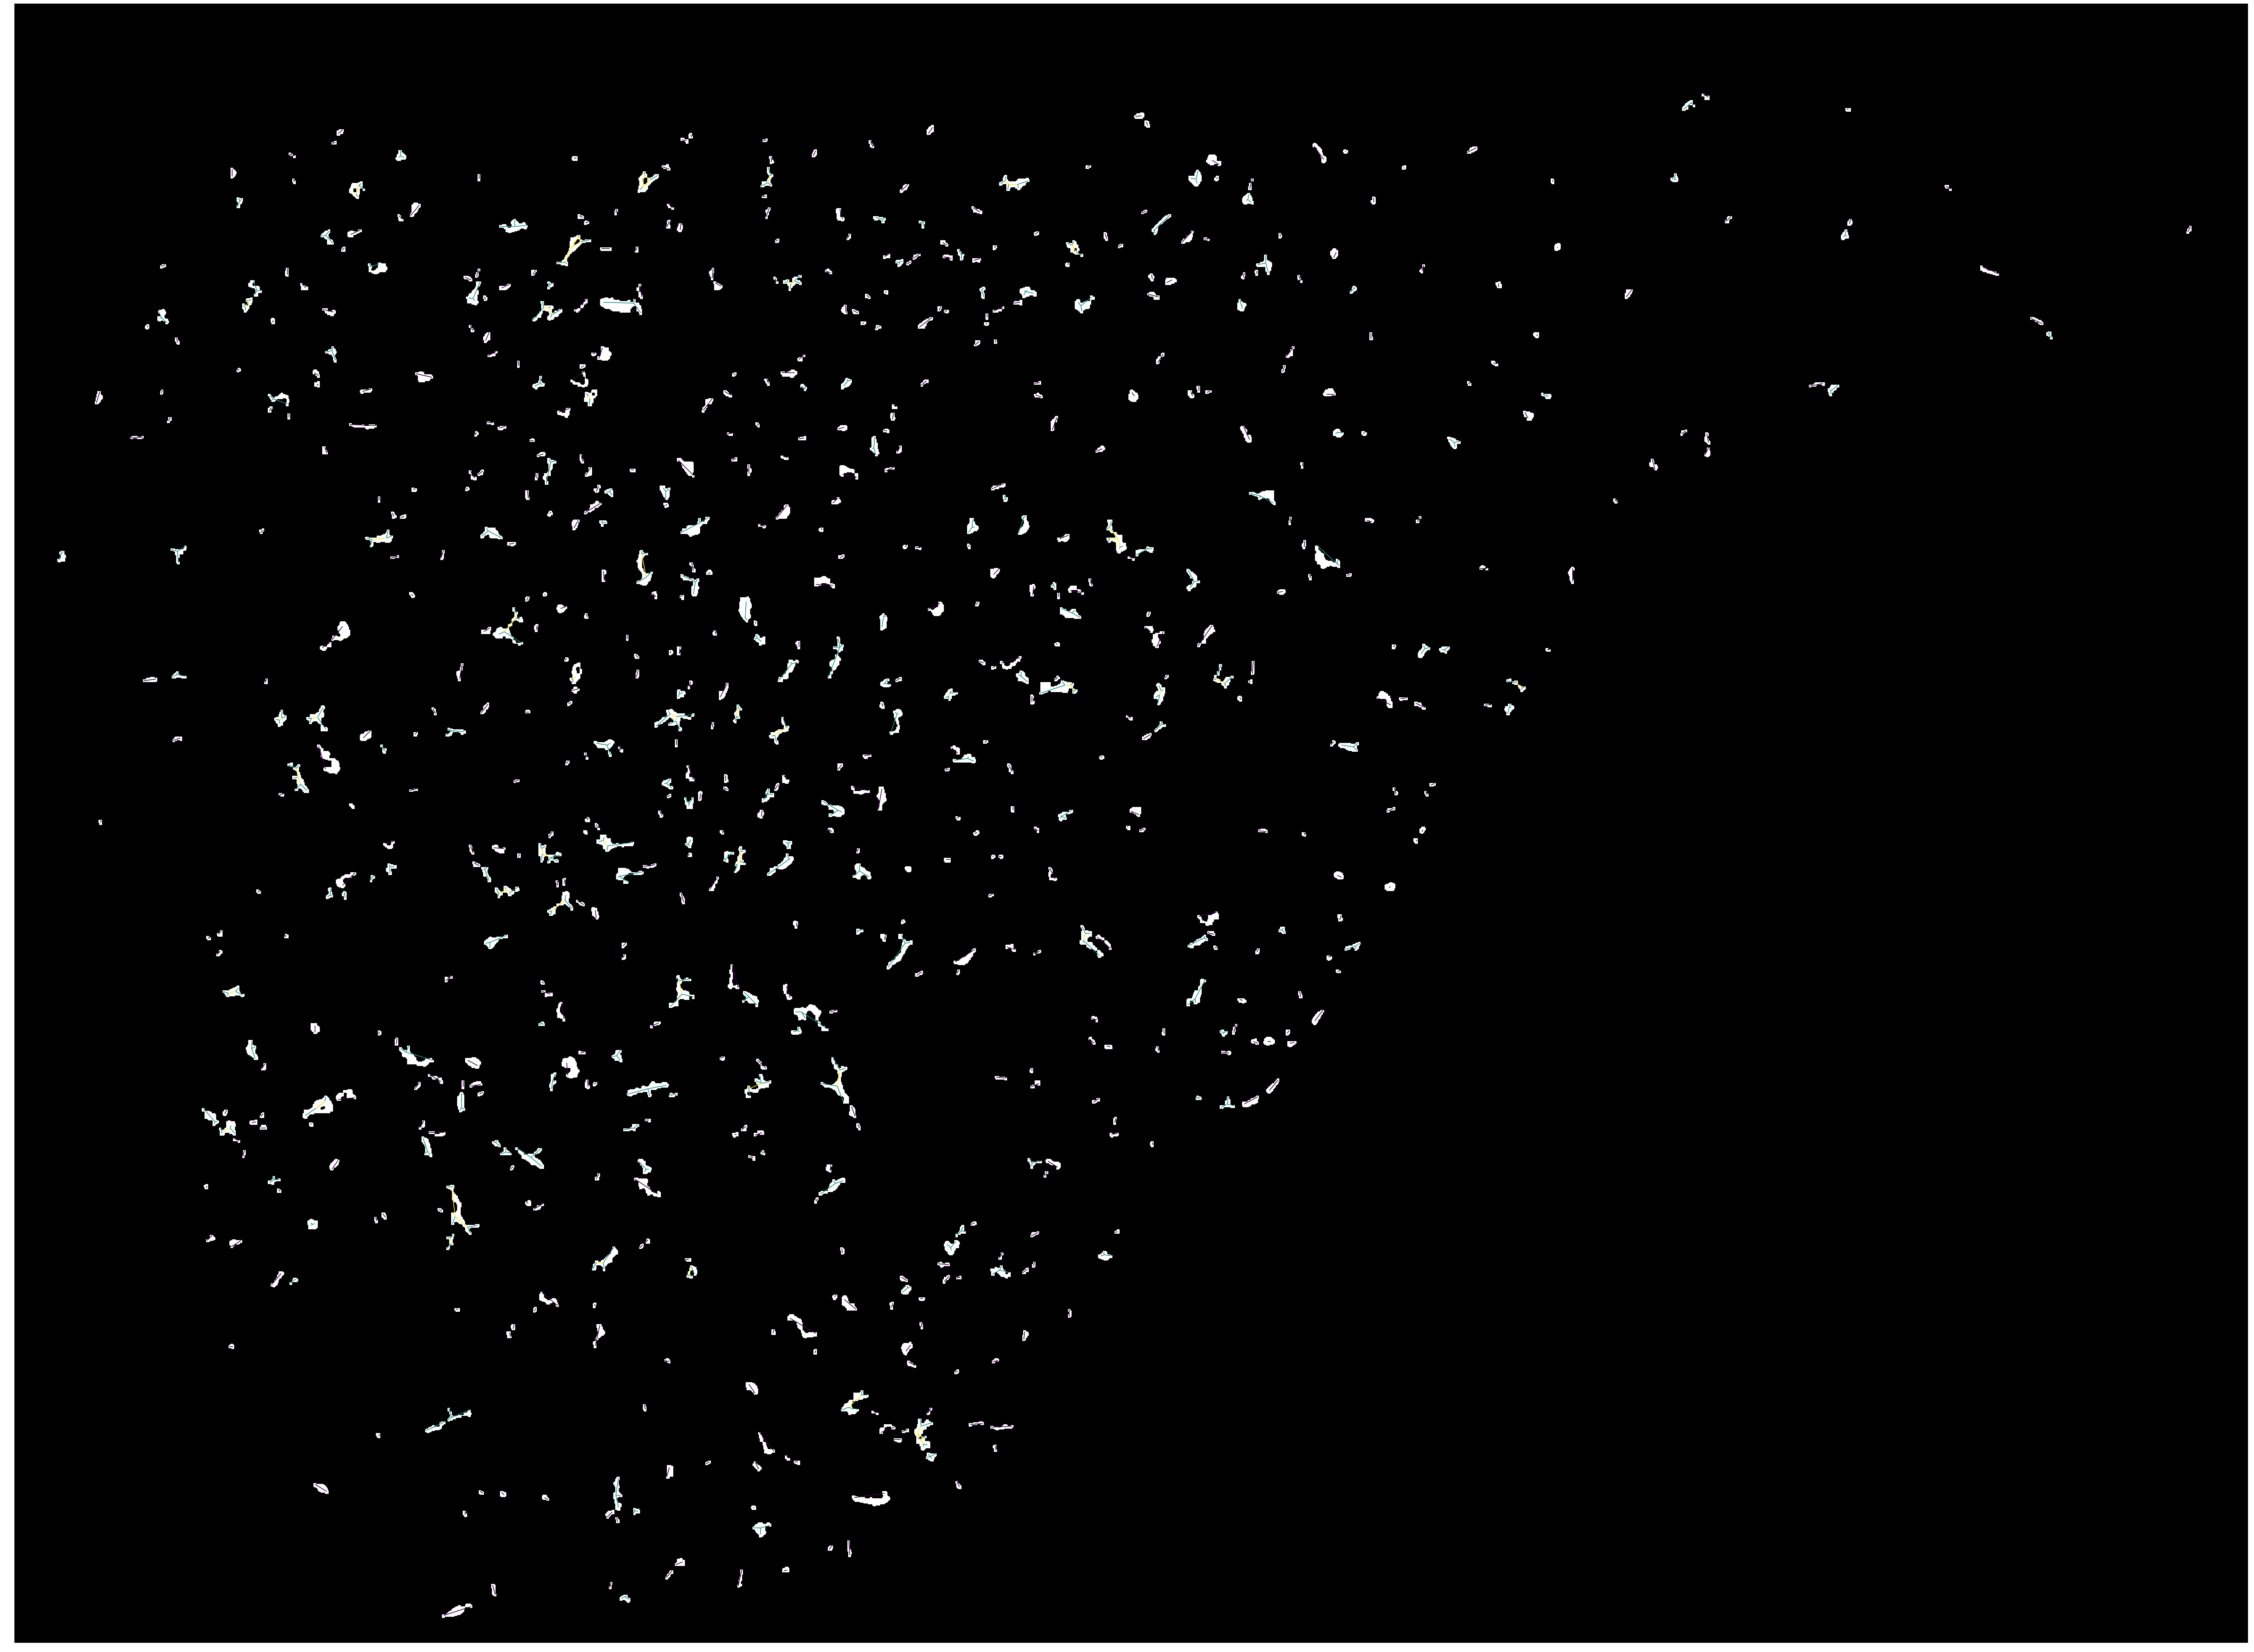

In [223]:
skel = imp.skeleton_image('.', cfile2, 10, 20, show=True, imname='skel_small.tif',
                   channel=1, figsize=(100, 100))

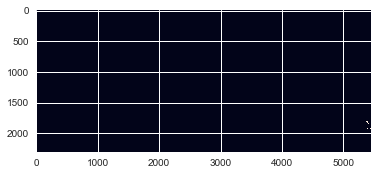

In [197]:
biim = skel.shortim
plt.imshow(biim)

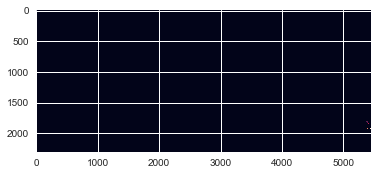

In [198]:
from skimage.measure import regionprops, label
labim = label(biim)
plt.imshow(labim)

In [199]:
Dfeatures = imp.mglia_features(skel, umppx=1)

In [184]:
Dfeatures

,X,Y,area,average_branch,eccentricity,inertia_tensor,label,main_branch,moments,perimeter,solidity,total_branches
0,30.483871,639.064516,217.0,46.727922,0.990638,"[[161.56265794559252, -12.471086665675637], [-...",1,46.727922,"[[217.0, 973.0, 5233.0, 30697.0], [4354.0, 222...",103.698485,0.700000,1
1,46.344741,803.881469,1198.0,14.571942,0.891907,"[[315.93085860964777, 29.438269402816562], [29...",3,37.099495,"[[1198.0, 17185.0, 328905.0, 7389943.0], [4178...",299.781746,0.641328,11
2,55.223618,540.464824,398.0,15.679947,0.917969,"[[97.36434054695592, -53.177463952930474], [-5...",6,28.427595,"[[398.0, 5263.0, 92785.0, 1863829.0], [8145.0,...",152.083261,0.536388,5
3,66.428571,471.760073,546.0,18.370840,0.945880,"[[213.82338754042016, 108.72318158032445], [10...",8,47.670236,"[[546.0, 10608.0, 257046.0, 6823794.0], [20071...",190.325902,0.513158,5
4,59.170404,889.753363,223.0,16.341113,0.970569,"[[115.40553801604766, -31.40525649017675], [-3...",10,32.257990,"[[223.0, 2045.0, 22397.0, 272681.0], [4405.0, ...",104.284271,0.550617,3
5,62.111446,715.108434,332.0,22.499389,0.934637,"[[140.33161561910296, 5.036180868050515], [5.0...",12,27.528100,"[[332.0, 3025.0, 33531.0, 417739.0], [8336.0, ...",135.597980,0.559865,3
6,73.625592,514.971564,211.0,11.482529,0.762045,"[[28.13189281462679, -6.643381774892739], [-6....",19,16.956686,"[[211.0, 1398.0, 12626.0, 131694.0], [2526.0, ...",69.698485,0.796226,3
7,91.978826,631.101059,1039.0,12.241149,0.976963,"[[676.8800662516057, -229.50647092553086], [-2...",20,31.800677,"[[1039.0, 21797.0, 578389.0, 17031317.0], [468...",302.409163,0.446498,13
8,82.565625,770.053125,320.0,6.943329,0.751362,"[[24.481552734375022, -8.563701171875001], [-8...",21,18.056201,"[[320.0, 3701.0, 57701.0, 1075619.0], [3857.0,...",91.597980,0.737327,7
9,77.402844,887.255924,211.0,11.852116,0.967007,"[[73.76388670515041, -14.200220120841852], [-1...",22,26.071068,"[[211.0, 1140.0, 7828.0, 61458.0], [3430.0, 21...",79.698485,0.764493,3


The output of mglia_features is a pandas dataframe containing all the features of individual cells. Users can perform analyses directly on this data. For example, users can calculate average area of a cell, or the total number of cells:

In [185]:
print('Average cell nuclei area: {} +/- {}'.format(np.round(np.mean(Dfeatures['area']), 1),
                                           np.round(np.std(Dfeatures['area']), 1)))
print('Cell count : {}'.format(Dfeatures.shape[0]))

Average cell nuclei area: 467.6 +/- 417.0
Cell count : 997


import seaborn as sns
import matplotlib.pyplot as plt
bins = np.linspace(0, 0.8, 33)
sns.set(color_codes=True)
sns.distplot(Dfeatures['total_branches'], bins=bins, kde=False)
plt.xlim([0.3, 0.8])

In [186]:
bins = np.linspace(0, 0.8,33)
bins

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  ])

(0.3, 0.8)

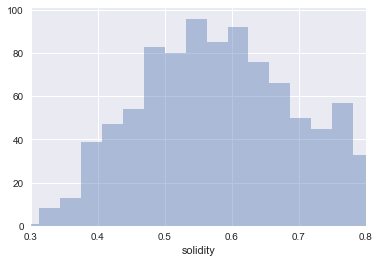

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
bins =np.linspace(0,1,33)
sns.set(color_codes=True)
sns.distplot(Dfeatures['solidity'], bins=bins, kde=False)
plt.xlim([0.3,0.8])

In [188]:
featcsv = 'features_{}.csv'.format(cprefix)
Dfeatures.to_csv(featcsv)
aws.upload_s3(featcsv, '{}/{}'.format(cfolder, featcsv), bucket_name=bucket)